In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sairathanmaheshwaram","key":"e8f786a7ec7c72dcbbb259eb00bc5fa7"}'}

In [2]:
!pip install kaggle

In [3]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# ! kaggle competitions download <name-of-competition>
!kaggle datasets download syedsaqlainhussain/sql-injection-dataset

Dataset URL: https://www.kaggle.com/datasets/syedsaqlainhussain/sql-injection-dataset
License(s): unknown
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 80.2MB/s]


In [5]:
!unzip /content/sql-injection-dataset.zip
!rm -rf /content/sql-injection-dataset.zip /content/sqli.csv /content/sqliv2.csv

Archive:  /content/sql-injection-dataset.zip
  inflating: SQLiV3.csv              
  inflating: sqli.csv                
  inflating: sqliv2.csv              


In [6]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('/content/SQLiV3.csv', encoding='utf-8') # Read the dataset.
df.head(10)

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
5,select name from syscolumns where id = ...,1,NaN,NaN
6,select * from users where id = 1 +$+ or 1 =...,1,NaN,NaN
7,"1; ( load_file ( char ( 47,101,116,99,47...",1,NaN,NaN
8,select * from users where id = '1' or ||/1 ...,1,NaN,NaN
9,select * from users where id = '1' or \.<\ ...,1,NaN,NaN


In [3]:
df.shape

(30919, 4)

In [4]:
df.columns

Index(['Sentence', 'Label', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentence    30904 non-null  object 
 1   Label       30664 non-null  object 
 2   Unnamed: 2  306 non-null    object 
 3   Unnamed: 3  9 non-null      float64
dtypes: float64(1), object(3)
memory usage: 966.3+ KB


In [6]:
df['Label'].value_counts()

,count
Label,
0,19268
1,11341
--,11
waitfor delay '0:0:__TIME__'--,5
DROP TABLE Suppliers,2
SELECT * FROM Customers,1
SELECT SUM ( Quantity ),1
SELECT column_name ( s ),1
*/,1


In [7]:
df = df[df['Label'].isin(['0','1'])]
df['Label'].value_counts()

,count
Label,
0,19268
1,11341


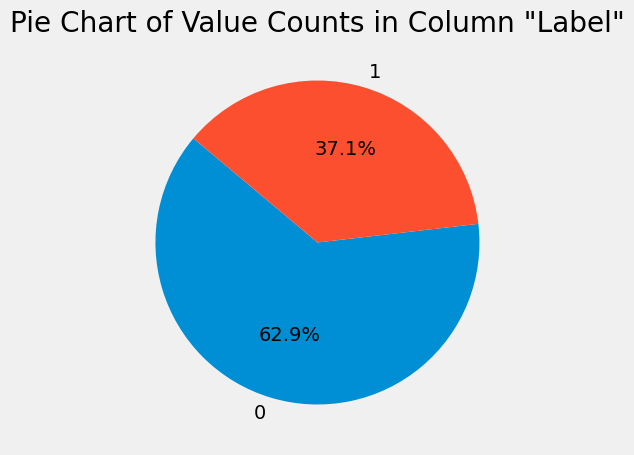

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = df[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [9]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3'])
df.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1


In [10]:
df['Label'] = df['Label'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 597.8+ KB


In [11]:
X = df.drop(columns=['Label'])
y = df[['Label']]

In [12]:
X.head()

,Sentence
0,""" or pg_sleep ( __TIME__ ) --"
2,AND 1 = utl_inaddr.get_host_address ( ...
3,select * from users where id = '1' or @ @1 ...
4,"select * from users where id = 1 or 1#"" ( ..."
5,select name from syscolumns where id = ...


In [13]:
y.head()

,Label
0,1
2,1
3,1
4,1
5,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24487, 1), (6122, 1), (24487, 1), (6122, 1))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train.values.ravel().tolist())
X_test = vectorizer.transform(X_test.values.ravel().tolist())

In [17]:
X_train.shape, X_test.shape

((24487, 20918), (6122, 20918))

In [18]:
label = y_test['Label'].unique().tolist()
label

[0, 1]

In [19]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 1.798112392425537
Prediction time (sec) = 0.0007205009460449219

Training score = 0.9865628024330027
Testing score = 0.9765896354505592

No of misclassified for class 0 (test data) = 53
No of misclassified for class 1 (test data) = 75
Total no of misclassified points (test data) = 128
Total % of misclassified points (test data) = 0.020908199934661875

Training log_loss = 0.1210463022043405
Testing log_loss = 0.11678137429752027

Confusion matrix:


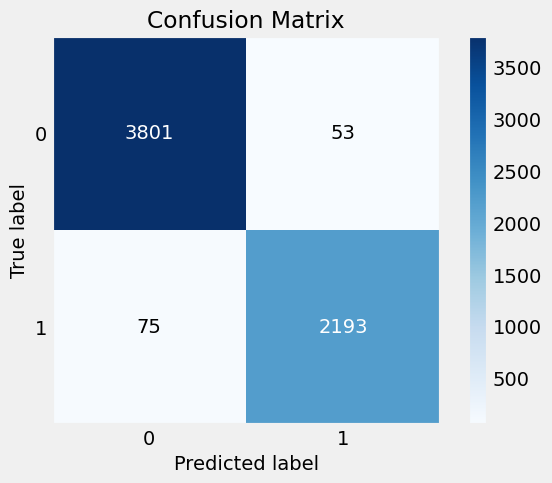

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3854
           1       0.98      0.97      0.97      2268

    accuracy                           0.98      6122
   macro avg       0.98      0.98      0.98      6122
weighted avg       0.98      0.98      0.98      6122

**************************************************************************


In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.18510127067565918
Prediction time (sec) = 0.0009622573852539062

Training score = 0.9967744007270812
Testing score = 0.9830228608770384

No of misclassified for class 0 (test data) = 34
No of misclassified for class 1 (test data) = 57
Total no of misclassified points (test data) = 91
Total % of misclassified points (test data) = 0.014864423391048678

Confusion matrix:


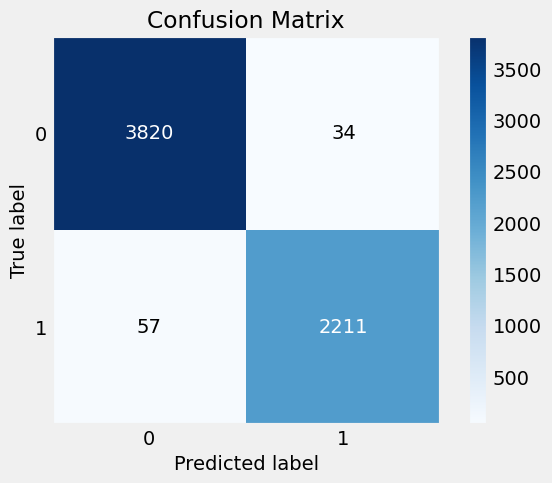

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3854
           1       0.98      0.97      0.98      2268

    accuracy                           0.99      6122
   macro avg       0.99      0.98      0.98      6122
weighted avg       0.99      0.99      0.99      6122

**************************************************************************


In [21]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 11.391423225402832
Prediction time (sec) = 0.03819012641906738

Training score = 0.9997924687422466
Testing score = 0.8289326282320575

No of misclassified for class 0 (test data) = 1288
No of misclassified for class 1 (test data) = 18
Total no of misclassified points (test data) = 1306
Total % of misclassified points (test data) = 0.21332897745834695

Training log_loss = 0.0005948413355423477
Testing log_loss = 0.9682921501552915

Confusion matrix:


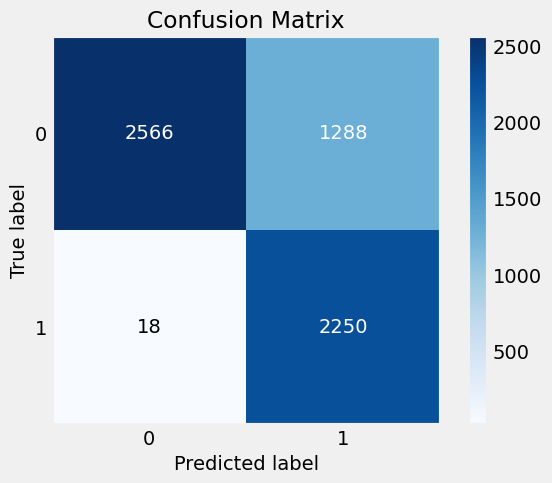

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      3854
           1       0.64      0.99      0.78      2268

    accuracy                           0.79      6122
   macro avg       0.81      0.83      0.79      6122
weighted avg       0.86      0.79      0.79      6122

**************************************************************************


In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 37.1753146648407
Prediction time (sec) = 4.492820739746094

Training score = 0.9997924687422466
Testing score = 0.8345747426572543

No of misclassified for class 0 (test data) = 1270
No of misclassified for class 1 (test data) = 3
Total no of misclassified points (test data) = 1273
Total % of misclassified points (test data) = 0.20793858216269193

Training log_loss = 0.0005948413355423488
Testing log_loss = 0.7898286165585482

Confusion matrix:


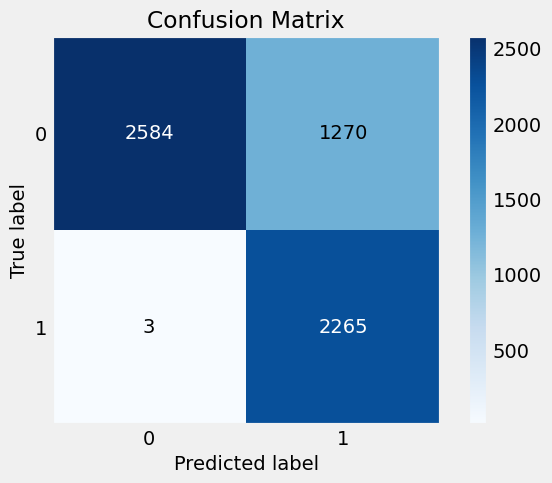

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80      3854
           1       0.64      1.00      0.78      2268

    accuracy                           0.79      6122
   macro avg       0.82      0.83      0.79      6122
weighted avg       0.87      0.79      0.79      6122

**************************************************************************


In [23]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 19.996558666229248
Prediction time (sec) = 2.6643736362457275

Training score = 0.9994356502655372
Testing score = 0.8267779233010162

No of misclassified for class 0 (test data) = 1325
No of misclassified for class 1 (test data) = 6
Total no of misclassified points (test data) = 1331
Total % of misclassified points (test data) = 0.2174126102580856

Training log_loss = 0.0967496483287672
Testing log_loss = 0.811862739981065

Confusion matrix:


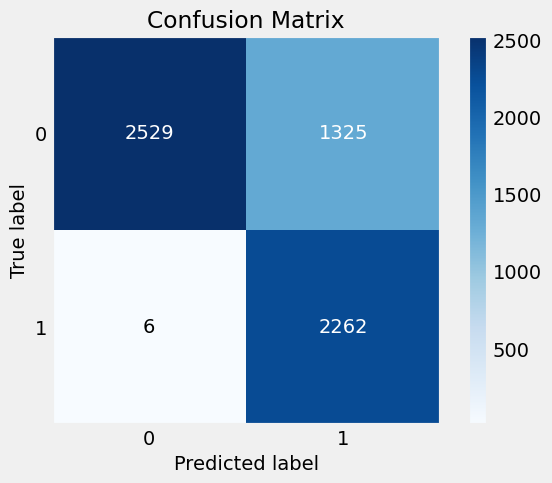

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.66      0.79      3854
           1       0.63      1.00      0.77      2268

    accuracy                           0.78      6122
   macro avg       0.81      0.83      0.78      6122
weighted avg       0.86      0.78      0.78      6122

**************************************************************************


In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [25]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results]
s2=['LR','LSVC','DTC','ETC','RFC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.986563,0.976590,128,0.020908,0.121046,0.116781,1.798112,0.000721
1,LSVC,0.996774,0.983023,91,0.014864,NaN,NaN,0.185101,0.000962
2,DTC,0.999792,0.828933,1306,0.213329,0.000595,0.968292,11.391423,0.038190
3,ETC,0.999792,0.834575,1273,0.207939,0.000595,0.789829,37.175315,4.492821
4,RFC,0.999436,0.826778,1331,0.217413,0.096750,0.811863,19.996559,2.664374


In [26]:
vectorizer

TfidfVectorizer()

In [27]:
lsvc

LinearSVC(class_weight='balanced')

In [28]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(vectorizer, lsvc)
joblib.dump(pipeline, 'sql_injection_model.joblib')

['sql_injection_model.joblib']

#Prediction

In [29]:
df.columns

Index(['Sentence', 'Label'], dtype='object')

In [30]:
sample_data_point = df.sample(1)
sample_data_point.to_dict(orient='index')[sample_data_point.index[0]]

{'Sentence': '1%"  )   procedure analyse  (  extractvalue  (  9627,concat  (  0x5c,  (  benchmark  (  5000000,md5  (  0x4b774c75   )    )      )    )     )  ,1  )  #',
 'Label': 1}

In [31]:
import joblib
sql_injection_model_path = '/content/sql_injection_model.joblib'
sql_injection_model_pipeline = joblib.load(sql_injection_model_path)

In [32]:
sql_injection_model_pipeline

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC(class_weight='balanced'))])

In [33]:
text = """SELECT option_value FROM wp_options WHERE option_name  =  '_options_middle_button_link' LIMIT 1"""
prediction = sql_injection_model_pipeline.predict([text])[0]
prediction

0

#web ui

In [34]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [35]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

sql_injection_model_path = '/content/sql_injection_model.joblib'
sql_injection_model_pipeline = joblib.load(sql_injection_model_path)

st.title("Sql attack")
text = st.text_input("Enter query")
if st.button("Predict"):
    prediction = sql_injection_model_pipeline.predict([text])[0]
    st.write("Prediction:", prediction)

Writing app.py


In [36]:
from pyngrok import ngrok

ngrok_key = "2rbVgmHjKswONL4hUu2RzqtRwZ6_3rYhfeF8abrbYW7AGb3t6"
port = 8501

ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

'https://b2bb-35-247-18-209.ngrok-free.app'

In [37]:
!rm -rf logs.txt && streamlit run app.py &>/content/logs.txt